In [1]:
from satisfying_sims.audio.dynamics import agc_rms, soft_limit_tanh, lowpass
from pathlib import Path
import numpy as np
import os
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
from pydub import AudioSegment




In [2]:
project_root = Path(os.getcwd()).parent
audio_dir = project_root / "assets" / "audio"
sample_name = "fireplace_crackle.wav"

In [3]:
if sample_name.endswith(".mp3"):
    audio = AudioSegment.from_mp3(audio_dir / f"{sample_name}")
    x = np.array(audio.get_array_of_samples())

    # Handle stereo
    if audio.channels > 1:
        x = x.reshape((-1, audio.channels))

    # Normalize to float32 in [-1, 1]
    x = x.astype(np.float32)
    x /= 2 ** (8 * audio.sample_width - 1)
    sr = audio.frame_rate
else:
    sr, x = wavfile.read(audio_dir / f"{sample_name}")



/var/folders/qc/qhpnmhd50xx6mpxpb99h7pw00000gn/T/ipykernel_75863/1765421904.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read(audio_dir / f"{sample_name}")


In [4]:
np.min(x), np.max(x)

(np.int32(-2147236608), np.int32(2147236608))

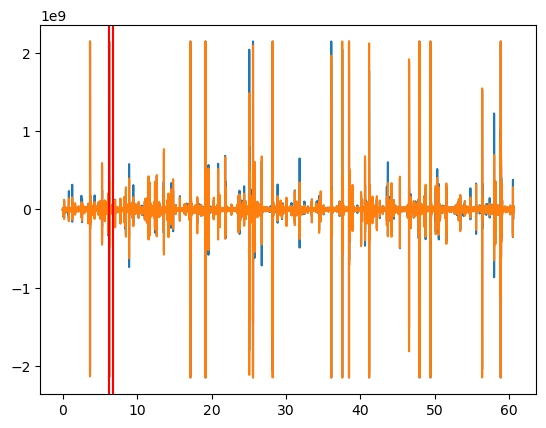

In [7]:
t_min = 6.15
t_max = 6.7
t = np.arange(len(x)) / sr
plt.plot(t, x)
plt.axvline(t_min, color='r')
plt.axvline(t_max, color='r')

In [8]:
def idx_from_time(t_cut, t):
    idx = np.where(np.abs(t - t_cut) == np.min(np.abs(t - t_cut)))[0][0]
    return idx

In [9]:
idx_min = idx_from_time(t_min, t)
idx_max = idx_from_time(t_max, t)
x_trimmed = x[idx_min:idx_max]

In [10]:
wavfile.write(audio_dir / f"{(audio_dir / f'{sample_name}').stem}_out.wav", sr, x_trimmed)

In [25]:
x.min(), x.max()

(np.float32(-1.0), np.float32(0.9999695))